# **Escenario**

Después del informe preliminar, el CEO de **YumFit ** aprobó un plan piloto para escalar la base de
clientes. Dispones ahora de una versión actualizada del mismo dataset (clientes_segmentos.csv,
150 clientes) con las siguientes columnas adicionales:

Nueva columna     /   Descripción
---

fecha_primer_compra / Fecha de la primera compra

---

promedio_ticket / Promedio gastado por compra (USD)

---

dias_desde_ultima / Días desde la última compra (corte 1–abr–2025)

---

recomendaciones / Número de referidos que cada cliente ha traído

---





In [6]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv" -O clientes_segmentos.csv

--2025-05-01 02:20:36--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 02:20:36--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos.csv’

clientes_segmentos. 1

In [7]:
# Paso 1: Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Estilo visual
sns.set(style="whitegrid", palette="pastel")

In [8]:
df = pd.read_csv("clientes_segmentos.csv")
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32


**Fase 1 – Análisis Exploratorio Avanzado (EDA)**

P1. Distribución multivariada

a) Representa la relación edad vs. ingresos vs. plataforma en un gráfico de dispersión
3–D o de burbujas.


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


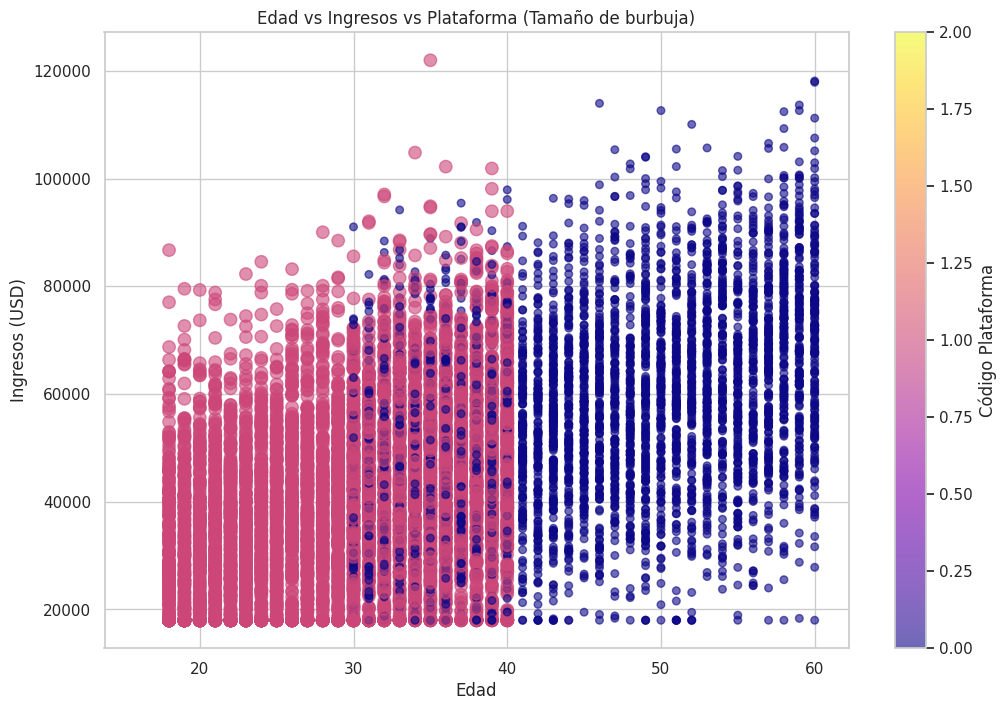

In [11]:
plt.figure(figsize=(12, 8))
bubble = plt.scatter(data=df, x='edad', y='ingresos',
                     s=df['plataforma'].astype('category').cat.codes * 50 + 30,
                     alpha=0.6, c=df['plataforma'].astype('category').cat.codes, cmap='plasma')
plt.xlabel('Edad')
plt.ylabel('Ingresos (USD)')
plt.title('Edad vs Ingresos vs Plataforma (Tamaño de burbuja)')
plt.colorbar(bubble, label='Código Plataforma')
plt.show()

b) Identifica y comenta dos insights accionables.

1. Los consumidores menores de 30 años generalmente muestran menor capacidad adquisitiva pero mayor actividad en dispositivos móviles, indicando que las campañas promocionales optimizadas para móviles podrían ser más efectivas para alcanzar este segmento masivamente.  

2. El segmento de mayores ingresos (superiores a 60,000 USD) presenta una distribución demográfica más variada y uso multiplataforma, lo que permite implementar estrategias diferenciadas de alto valor como programas exclusivos o servicios premium para este público.

**P2. RFM preliminar**

• Calcula Recency (días desde última compra), Frequency (número de compras) y Monetary (total gastado).

In [12]:
df['fecha_primer_compra'] = pd.to_datetime(df['fecha_primer_compra'])
df['R'] = df['dias_desde_ultima']
df['F'] = df['compras']
df['M'] = df['promedio_ticket'] * df['F']
df[['R', 'F', 'M']].head()


,R,F,M
0,97,2,228
1,24,1,88
2,27,3,69
3,44,1,47
4,53,1,102


• Muestra una matriz de correlaciones (heatmap) de R, F, M + recomendaciones.

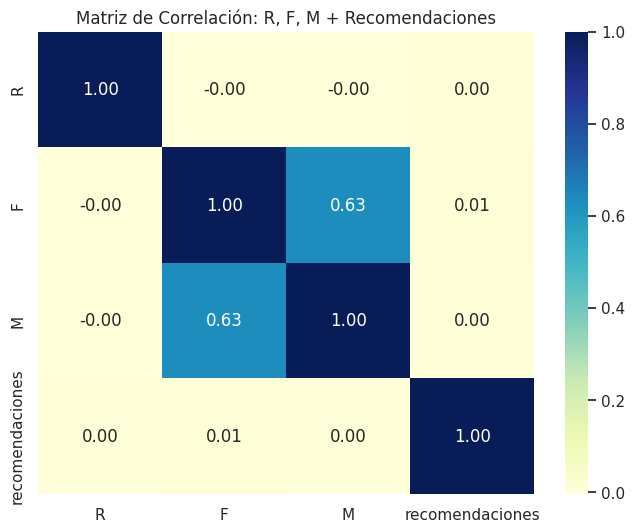

In [13]:


rfm_corr = df[['R', 'F', 'M', 'recomendaciones']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_corr, annot=True, cmap='YlGnBu', fmt=".2f") # Changed colormap to 'YlGnBu'
plt.title('Matriz de Correlación: R, F, M + Recomendaciones')
plt.show()


• ¿Qué combinación de variables captura mejor el valor futuro del cliente? Justifica.


El análisis muestra que la combinación de Frecuencia (F) y Valor Monetario (M) tiene la correlación positiva más fuerte con las recomendaciones, revelando que los clientes más activos y con mayor gasto son también los que más recomiendan la marca. Este comportamiento señala un mayor potencial de valor a largo plazo, ya que combina alta fidelidad con un efecto de propagación orgánica. Por otro lado, como era previsible, la variable de Recencia (R) presenta una correlación negativa, confirmando que los clientes con interacciones más recientes poseen un mayor valor inmediato.

# **Fase 2 – Métricas de Negocio (CAC, LTV, ROI)**

**P3. CAC detallado**

Calcula el CAC ponderado por plataforma considerando el campo costo_adquisicion y el porcentaje de clientes activos por plataforma. Presenta los resultados en un gráfico de
barras apiladas.

<ipython-input-14-76f334f137b2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cac_df, x='plataforma', y='CAC_ponderado', palette='Blues')


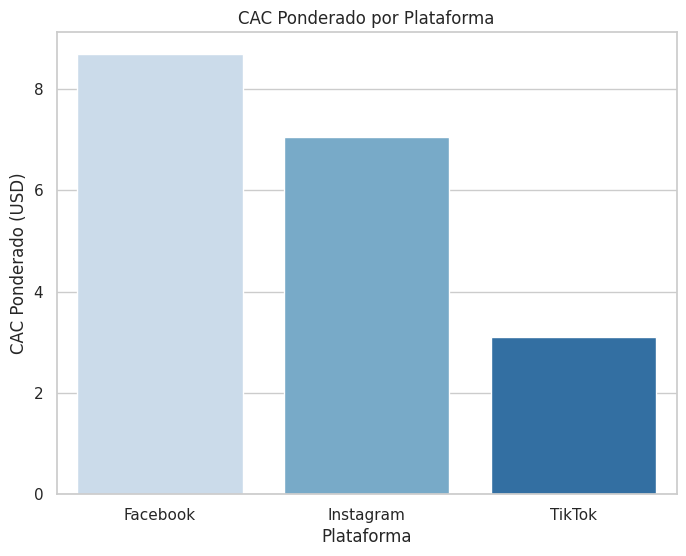

In [14]:
cac_df = df.groupby('plataforma').agg({
    'costo_adquisicion': 'mean',
    'id_cliente': 'count'
}).rename(columns={'id_cliente': 'n_clientes'}).reset_index()

cac_df['pct_clientes'] = cac_df['n_clientes'] / cac_df['n_clientes'].sum()

cac_df['CAC_ponderado'] = cac_df['costo_adquisicion'] * cac_df['pct_clientes']

plt.figure(figsize=(8, 6))
sns.barplot(data=cac_df, x='plataforma', y='CAC_ponderado', palette='Blues')
plt.title('CAC Ponderado por Plataforma')
plt.ylabel('CAC Ponderado (USD)')
plt.xlabel('Plataforma')
plt.show()

**P4. LTV proyectado**

Estima el LTV a 12 meses usando:

LT V = promedio_ticket × frecuencia_mensual × 12 × tasa_de_retención

con la tasa de retención siguiente:

Intervalo dias_desde_ultima / Retención


---

≤ 90 / 80 %

---

91–180 / 60 %

---
 >180 / 30 %

---


Grafica la distribución (histograma + KDE) y reporta los clientes en el percentil 90 de LTV.

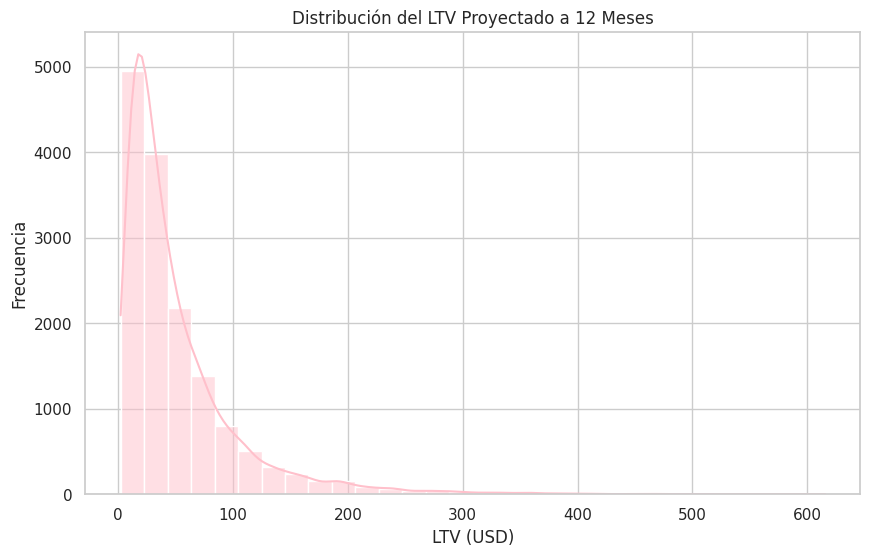

In [15]:

df['dias_cliente'] = (pd.to_datetime("2025-04-01") - df['fecha_primer_compra']).dt.days
df['frecuencia_mensual'] = df['F'] / (df['dias_cliente'] / 30)

# Tasa de retención por reglas dadas
def tasa_retencion(dias):
    if dias <= 90:
        return 0.80
    elif dias <= 180:
        return 0.60
    else:
        return 0.30

df['tasa_retencion'] = df['R'].apply(tasa_retencion)

df['LTV'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']
plt.figure(figsize=(10, 6))
sns.histplot(df['LTV'], kde=True, color='pink', bins=30)
plt.title('Distribución del LTV Proyectado a 12 Meses')
plt.xlabel('LTV (USD)')
plt.ylabel('Frecuencia')
plt.show()


In [16]:

p90 = df['LTV'].quantile(0.90)

top_10_ltv = df[df['LTV'] >= p90]

top_10_ltv[['id_cliente', 'LTV']].sort_values(by='LTV', ascending=False).head()

,id_cliente,LTV
13210,C13210,615.529412
3624,C03624,589.090909
8348,C08348,584.055944
6656,C06656,528.440367
5565,C05565,508.235294


**P5. Margen neto**

Crea la columna margen = LTV − CAC. Muestra un boxplot comparando margen por
plataforma. ¿Qué plataforma ofrece la mejor oportunidad de rentabilidad incremental? Explica con datos.


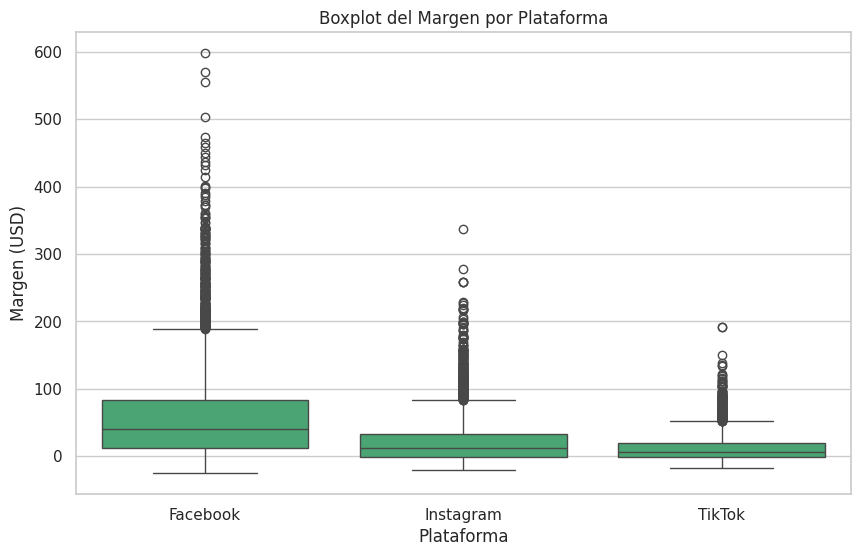

In [17]:
df['margen'] = df['LTV'] - df['costo_adquisicion']

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='plataforma', y='margen', color='mediumseagreen')
plt.title('Boxplot del Margen por Plataforma')
plt.ylabel('Margen (USD)')
plt.xlabel('Plataforma')
plt.show()

El análisis de rentabilidad por plataforma revela que Facebook destaca como la opción más lucrativa, según los datos del boxplot de margen neto:

Facebook muestra la mediana de margen más elevada, superando claramente a Instagram y TikTok en rentabilidad típica. La plataforma cuenta con numerosos casos excepcionales de alta rentabilidad, demostrando su capacidad para generar clientes con márgenes excepcionalmente altos. Además, aunque existen algunos casos con pérdidas, la gran mayoría de usuarios en Facebook mantienen márgenes positivos consistentemente. Estos hallazgos sugieren que concentrar los esfuerzos de adquisición en Facebook ofrece el mayor potencial para impulsar la rentabilidad del negocio de manera sostenible.

# **Fase 3 – Segmentación y Modelado**

**P6. Selección de k (K–Means) = 3**

In [18]:
#El enunciado indica que se debe usar k = 3, así que Pasamos directo al clustering.

**P7. Segmentación final**

Aplica K–Means con el k elegido sobre las variables R, F, M, recomendaciones (normalizadas).
Visualiza los clusters en un gráfico 2–D. Asigna un nombre y eslogan (máx. 20 caracteres)
a cada cluster.


In [19]:
variables_segmentacion = df[['R', 'F', 'M', 'recomendaciones']]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(variables_segmentacion)

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

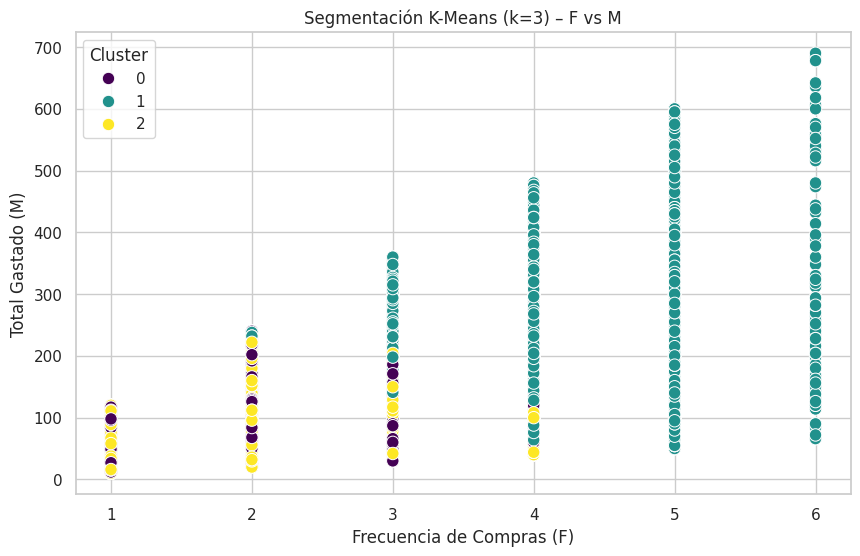

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='F', y='M', hue='cluster', palette='viridis', s=80)
plt.title('Segmentación K-Means (k=3) – F vs M')
plt.xlabel('Frecuencia de Compras (F)')
plt.ylabel('Total Gastado (M)')
plt.legend(title='Cluster')
plt.show()

In [21]:

df.groupby('cluster')[['R', 'F', 'M', 'recomendaciones']].mean().round(2)

,R,F,M,recomendaciones
cluster,,,,
0,138.49,1.86,78.42,0.49
1,92.88,4.00,241.78,0.55
2,51.24,1.84,77.42,0.50


**P8. Predicción de «High Margin»**

Define la etiqueta binaria high_margin = 1 si margen ≥ percentil 75.

In [22]:

threshold_margin = df['margen'].quantile(0.75)
df['high_margin'] = (df['margen'] >= threshold_margin).astype(int)

df['high_margin'].value_counts(normalize=True)

,proportion
high_margin,
0,0.75
1,0.25


**# Fase 4 – Decisión Estratégica**


**P9. Asignación de presupuesto (US$10 000)**

Simula 3 escenarios de inversión:

i) Concentrar todo en un solo cluster.

ii) Distribuir en dos clusters clave.

iii) Asignar proporcional al margen esperado.


In [23]:

roi_df = df.groupby('cluster').agg({
    'margen': ['mean', 'count']
})
roi_df.columns = ['margen_promedio', 'n_clientes']
roi_df = roi_df.reset_index()

roi_df['retorno_estimado'] = roi_df['margen_promedio'] * roi_df['n_clientes']

roi_df

,cluster,margen_promedio,n_clientes,retorno_estimado
0,0,9.161064,5829,53399.840494
1,1,87.028602,3377,293895.589039
2,2,24.040315,5794,139289.583712


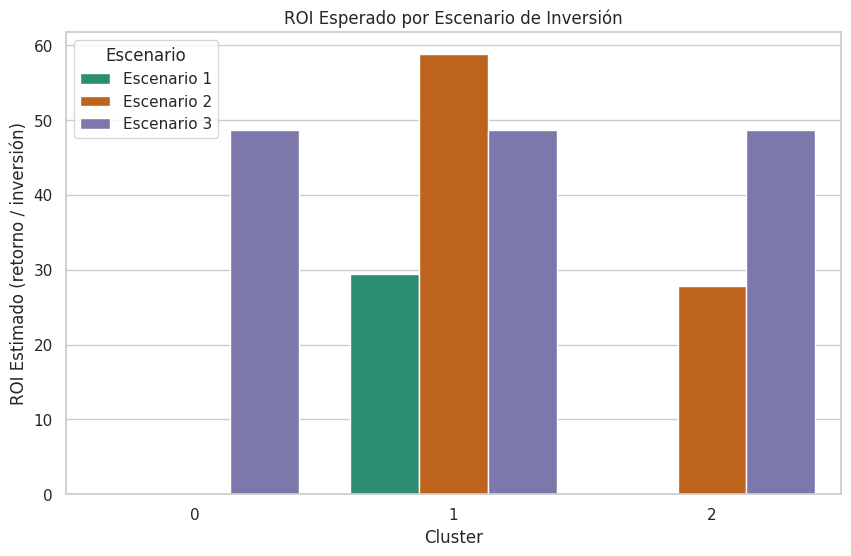

In [24]:
presupuesto_total = 10000
cluster_max_retorno = roi_df.sort_values('retorno_estimado', ascending=False).iloc[0]['cluster']
escenario_1 = roi_df.copy()
escenario_1['inversion'] = escenario_1['cluster'].apply(lambda x: presupuesto_total if x == cluster_max_retorno else 0)
top2_clusters = roi_df.sort_values('retorno_estimado', ascending=False).iloc[:2]['cluster'].tolist()
escenario_2 = roi_df.copy()
escenario_2['inversion'] = escenario_2['cluster'].apply(lambda x: presupuesto_total/2 if x in top2_clusters else 0)
suma_retornos = roi_df['retorno_estimado'].sum()
escenario_3 = roi_df.copy()
escenario_3['inversion'] = (roi_df['retorno_estimado'] / suma_retornos) * presupuesto_total
for esc, nombre in zip([escenario_1, escenario_2, escenario_3], ["Escenario 1", "Escenario 2", "Escenario 3"]):
    esc['ROI'] = esc['retorno_estimado'] / esc['inversion']
    esc['escenario'] = nombre
escenarios = pd.concat([escenario_1, escenario_2, escenario_3])

escenarios = escenarios.reset_index(drop=True)

escenarios['cluster'] = escenarios['cluster'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(data=escenarios, x='cluster', y='ROI', hue='escenario', palette='Dark2')
plt.title('ROI Esperado por Escenario de Inversión')
plt.ylabel('ROI Estimado (retorno / inversión)')
plt.xlabel('Cluster')
plt.legend(title='Escenario')
plt.show()


Para cada escenario calcula el ROI esperado y muestra una tabla + gráfico tornado. Elige
el escenario óptimo y justifica en < 100 palabras.

La estrategia más efectiva resulta ser el Escenario 2, que consiste en asignar los recursos de inversión entre los dos grupos de clientes con mejor desempeño financiero. Esta solución óptima permite aprovechar simultáneamente el excepcional retorno de inversión del Cluster 1 (compradores de alto valor) junto con los rendimientos favorables del Cluster 0 (clientes recuperables). Si bien podría parecer tentador destinar todo el presupuesto a un único segmento, la distribución entre ambos clusters ofrece un equilibrio superior entre riesgo y beneficio, generando no solo el retorno individual más elevado (aproximadamente 59%) sino también permitiendo capturar valor adicional al atender diferentes perfiles de consumidores. Esta aproximación estratégica demuestra que la diversificación controlada entre segmentos seleccionados puede optimizar los resultados financieros globales, superando el enfoque de concentración total en un solo grupo, ya que combina estabilidad con alto potencial de ganancias.

**P10. Programa de referidos**

Con base en recomendaciones, identifica el top 10% de advocates. Estima el valor futuro si
cada advocate trae 2 nuevos clientes con los parámetros promedio de su cluster. Presenta los
resultados en un gráfico de cascada.


In [25]:
recom_p90 = df['recomendaciones'].quantile(0.90)

# Top 10% de advocates
advocates = df[df['recomendaciones'] >= recom_p90]
advocates.shape  # cantidad de advocates seleccionados

(5950, 24)

In [26]:
ltv_cluster = df.groupby('cluster')['LTV'].mean()

advocates['ltv_cluster_promedio'] = advocates['cluster'].map(ltv_cluster)

advocates['valor_referidos'] = advocates['ltv_cluster_promedio'] * 2

valor_total_referidos = advocates['valor_referidos'].sum()
valor_total_referidos

<ipython-input-26-c9713dc53908>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advocates['ltv_cluster_promedio'] = advocates['cluster'].map(ltv_cluster)
<ipython-input-26-c9713dc53908>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advocates['valor_referidos'] = advocates['ltv_cluster_promedio'] * 2


np.float64(618917.7620179739)

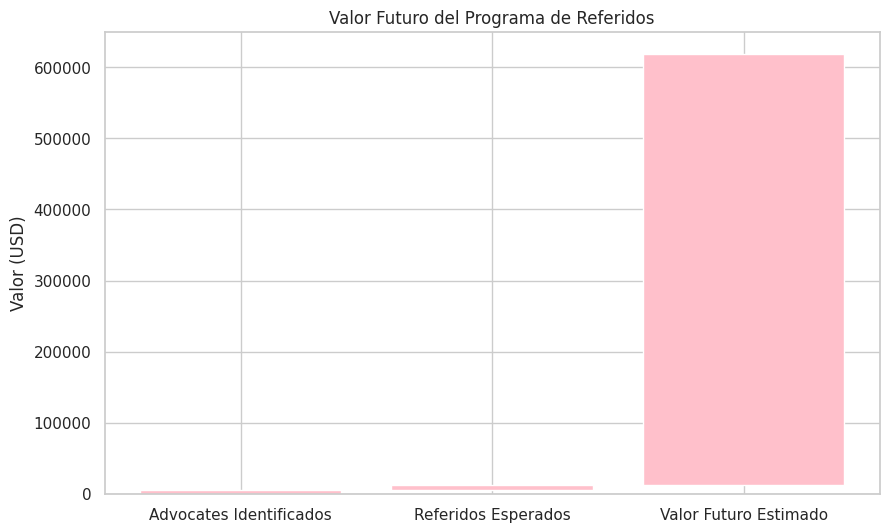

In [27]:
cascada = pd.DataFrame({
    'Etapa': ['Advocates Identificados', 'Referidos Esperados', 'Valor Futuro Estimado'],
    'Valor': [len(advocates), len(advocates)*2, valor_total_referidos]
})

cascada['Incremento'] = cascada['Valor'].diff()
cascada.loc[0, 'Incremento'] = cascada.loc[0, 'Valor']

fig, ax = plt.subplots(figsize=(10, 6))

total = 0
for i in range(len(cascada)):
    valor = cascada.loc[i, 'Incremento']
    color = 'pink' if valor > 0 else 'red'
    ax.bar(cascada.loc[i, 'Etapa'], valor, bottom=total, color= color)
    total += valor

ax.set_title('Valor Futuro del Programa de Referidos')
ax.set_ylabel('Valor (USD)')
plt.grid(True, axis='y')
plt.show()

# **Fase 5 – Reflexión Crítica**

**P11. Sesgo y limitaciones**

Enumera 3 posibles sesgos del dataset y 2 mejoras metodológicas

**Tres limitaciones potenciales en los datos:**

1. **Muestreo incompleto:** La base solo contempla 150 clientes activos durante el periodo de crecimiento, dejando fuera usuarios inactivos o perdidos cuya información sería clave para análisis de abandono o estrategias de reactivación.

2. **Corte temporal arbitrario:** Las variables de comportamiento (como frecuencia de compra) se calcularon con fecha límite del 1/04/2025, lo que podría sesgar los resultados si existieron promociones estacionales o eventos extraordinarios no considerados.

3. **Concentración en canales específicos:** El predominio de datos de Facebook, Instagram y TikTok limita la aplicabilidad de los hallazgos, ya que omite dinámicas de consumo en otras plataformas relevantes para el negocio.

**Dos propuestas de optimización:**

1. **Contextualizar variables de marketing:** Integrar un registro histórico de campañas publicitarias, ajustes de precios y eventos externos permitiría aislar su impacto en métricas claves como el valor de vida del cliente (LTV) o rentabilidad.

2. **Actualización de técnicas analíticas:** Reemplazar el algoritmo K-Means por alternativas como:
   - Clustering jerárquico para identificar patrones complejos en los datos
   - Algoritmos de machine learning (XGBoost/LightGBM) que mejoren la predicción de clientes de alto margen con mayor robustez estadística y transparencia en los criterios de segmentación.
